## Coursera - IBM Data Science Professional
## Applied Data Science - Capstone Final
### [Date] December 2020   [Name] Ching Chieh (Marcos) Hsiao-Tseng

In [1]:
# import all python libraries needed for this capstone

# import library to handle lxml
!conda install -c conda-forge lxml --yes
from lxml import etree

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from folium import plugins

Solving environment: done

# All requested packages already installed.



In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis

# use the inline backend to generate the plots within the browser
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans # import k-means from clustering stage

print('Libraries imported.')

Matplotlib version:  3.3.3
Libraries imported.


In [3]:
# download link for City of Chicago Crimes - 2020 in csv format
# this link can be updated for any available crimes dataset in the Chicago Data Portal
!wget --quiet !wget --quiet https://data.cityofchicago.org/api/views/qzdf-xmn8/rows.csv?accessType=DOWNLOAD
    
print('File downloaded!')

File downloaded!


In [4]:
# load dataset into pandas dataframe
df = pd.read_csv(r'rows.csv?accessType=DOWNLOAD')

In [5]:
# clean up the dataset by removing unnecessary columns 
df.drop(['ID', 'Case Number', 'IUCR', 'Domestic', 'Beat', 'District', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Location'], axis=1, inplace=True)
df

Date                  Block         Primary Type  \
0       03/17/2020 09:30:00 PM   039XX N LECLAIRE AVE                THEFT   
1       03/18/2020 02:03:00 AM   039XX W JACKSON BLVD  MOTOR VEHICLE THEFT   
2       03/18/2020 08:50:00 AM     023XX N KEELER AVE              ASSAULT   
3       03/18/2020 01:00:00 PM      047XX W MONROE ST   DECEPTIVE PRACTICE   
4       03/18/2020 05:35:00 PM     003XX S CICERO AVE            NARCOTICS   
...                        ...                    ...                  ...   
205987  11/20/2020 08:00:00 AM  032XX S PRINCETON AVE   DECEPTIVE PRACTICE   
205988  10/01/2020 09:00:00 AM    052XX S KIMBARK AVE                THEFT   
205989  12/26/2020 09:00:00 PM     019XX S WABASH AVE        OTHER OFFENSE   
205990  12/26/2020 07:37:00 PM        003XX W 74TH ST    WEAPONS VIOLATION   
205991  12/26/2020 07:50:00 AM        015XX W 94TH ST              ROBBERY   

                                    Description Location Description  Arrest  \
0                                $500 AND UNDER               STREET   False   
1                                    AUTOMOBILE            APARTMENT   False   
2                                        SIMPLE            RESIDENCE   False   
3                             CREDIT CARD FRAUD      OTHER (SPECIFY)   False   
4                 MANUFACTURE / DELIVER - CRACK             SIDEWALK    True   
...                                         ...                  ...     ...   
205987  FINANCIAL IDENTITY THEFT $300 AND UNDER            APARTMENT   False   
205988                            FROM BUILDING            APARTMENT   False   
205989           HARASSMENT BY ELECTRONIC MEANS            APARTMENT   False   
205990            UNLAWFUL POSSESSION - HANDGUN               STREET    True   
205991       ARMED - KNIFE / CUTTING INSTRUMENT            APARTMENT   False   

        Community Area   Latitude  Longitude  
0                 15.0  41.952052 -87.754660  
1                 26.0  41.877110 -87.723990  
2                 20.0  41.923369 -87.731634  
3                 25.0  41.879264 -87.743971  
4                 25.0  41.876128 -87.745112  
...                ...        ...        ...  
205987            34.0  41.835599 -87.634039  
205988            41.0  41.800645 -87.595052  
205989            33.0  41.856107 -87.625572  
205990            69.0  41.759930 -87.632615  
205991            73.0  41.723044 -87.662017  

[205992 rows x 9 columns]

In [6]:
# create a copy of the dataframe (allows for manipulation and also maintain a copy of the original)
df2 = df.copy()
df2

Date                  Block         Primary Type  \
0       03/17/2020 09:30:00 PM   039XX N LECLAIRE AVE                THEFT   
1       03/18/2020 02:03:00 AM   039XX W JACKSON BLVD  MOTOR VEHICLE THEFT   
2       03/18/2020 08:50:00 AM     023XX N KEELER AVE              ASSAULT   
3       03/18/2020 01:00:00 PM      047XX W MONROE ST   DECEPTIVE PRACTICE   
4       03/18/2020 05:35:00 PM     003XX S CICERO AVE            NARCOTICS   
...                        ...                    ...                  ...   
205987  11/20/2020 08:00:00 AM  032XX S PRINCETON AVE   DECEPTIVE PRACTICE   
205988  10/01/2020 09:00:00 AM    052XX S KIMBARK AVE                THEFT   
205989  12/26/2020 09:00:00 PM     019XX S WABASH AVE        OTHER OFFENSE   
205990  12/26/2020 07:37:00 PM        003XX W 74TH ST    WEAPONS VIOLATION   
205991  12/26/2020 07:50:00 AM        015XX W 94TH ST              ROBBERY   

                                    Description Location Description  Arrest  \
0                                $500 AND UNDER               STREET   False   
1                                    AUTOMOBILE            APARTMENT   False   
2                                        SIMPLE            RESIDENCE   False   
3                             CREDIT CARD FRAUD      OTHER (SPECIFY)   False   
4                 MANUFACTURE / DELIVER - CRACK             SIDEWALK    True   
...                                         ...                  ...     ...   
205987  FINANCIAL IDENTITY THEFT $300 AND UNDER            APARTMENT   False   
205988                            FROM BUILDING            APARTMENT   False   
205989           HARASSMENT BY ELECTRONIC MEANS            APARTMENT   False   
205990            UNLAWFUL POSSESSION - HANDGUN               STREET    True   
205991       ARMED - KNIFE / CUTTING INSTRUMENT            APARTMENT   False   

        Community Area   Latitude  Longitude  
0                 15.0  41.952052 -87.754660  
1                 26.0  41.877110 -87.723990  
2                 20.0  41.923369 -87.731634  
3                 25.0  41.879264 -87.743971  
4                 25.0  41.876128 -87.745112  
...                ...        ...        ...  
205987            34.0  41.835599 -87.634039  
205988            41.0  41.800645 -87.595052  
205989            33.0  41.856107 -87.625572  
205990            69.0  41.759930 -87.632615  
205991            73.0  41.723044 -87.662017  

[205992 rows x 9 columns]

In [7]:
# remove rows with no values and for crimes where there was no arrest
df2['Community Area'].replace('', np.nan, inplace=True)
df2['Latitude'].replace('', np.nan, inplace=True)
df2['Longitude'].replace('', np.nan, inplace=True)
df2['Arrest'].replace(False, np.nan, inplace=True)
df2.dropna(subset=['Community Area', 'Latitude', 'Longitude', 'Arrest'], inplace=True)

# reset the dataframe index
df2 = df2.reset_index(drop=True)
df2

Date                   Block  \
0      03/18/2020 05:35:00 PM      003XX S CICERO AVE   
1      03/18/2020 11:52:00 PM    056XX S MARYLAND AVE   
2      03/16/2020 12:05:00 PM      089XX S WALLACE ST   
3      03/17/2020 09:30:00 PM    023XX S ST LOUIS AVE   
4      02/24/2020 02:54:00 AM     052XX N SHERIDAN RD   
...                       ...                     ...   
32603  12/26/2020 02:15:00 AM         009XX E 81ST ST   
32604  12/26/2020 07:45:00 AM       0000X S MASON AVE   
32605  12/26/2020 08:50:00 PM      004XX S PULASKI RD   
32606  12/26/2020 02:18:00 PM  065XX S MARSHFIELD AVE   
32607  12/26/2020 07:37:00 PM         003XX W 74TH ST   

                           Primary Type  \
0                             NARCOTICS   
1      INTERFERENCE WITH PUBLIC OFFICER   
2                               BATTERY   
3                               BATTERY   
4                                 THEFT   
...                                 ...   
32603                           BATTERY   
32604                           BATTERY   
32605                 CRIMINAL TRESPASS   
32606                 WEAPONS VIOLATION   
32607                 WEAPONS VIOLATION   

                                             Description Location Description  \
0                          MANUFACTURE / DELIVER - CRACK             SIDEWALK   
1                     RESIST / OBSTRUCT / DISARM OFFICER               STREET   
2                                DOMESTIC BATTERY SIMPLE            RESIDENCE   
3      AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...            RESIDENCE   
4                                              OVER $500      OTHER (SPECIFY)   
...                                                  ...                  ...   
32603                            DOMESTIC BATTERY SIMPLE            RESIDENCE   
32604                            DOMESTIC BATTERY SIMPLE             SIDEWALK   
32605                                         TO VEHICLE               STREET   
32606                      UNLAWFUL POSSESSION - HANDGUN               STREET   
32607                      UNLAWFUL POSSESSION - HANDGUN               STREET   

       Arrest  Community Area   Latitude  Longitude  
0         1.0            25.0  41.876128 -87.745112  
1         1.0            41.0  41.792195 -87.604959  
2         1.0            71.0  41.731656 -87.638630  
3         1.0            30.0  41.848873 -87.712480  
4         1.0            77.0  41.976852 -87.655000  
...       ...             ...        ...        ...  
32603     1.0            44.0  41.747661 -87.601919  
32604     1.0            25.0  41.879783 -87.773012  
32605     1.0            26.0  41.874744 -87.725459  
32606     1.0            67.0  41.775175 -87.665370  
32607     1.0            69.0  41.759930 -87.632615  

[32608 rows x 9 columns]

In [8]:
# convert Community Area column to type integer
df2['Community Area'] = df2['Community Area'].astype(int)
df2

Date                   Block  \
0      03/18/2020 05:35:00 PM      003XX S CICERO AVE   
1      03/18/2020 11:52:00 PM    056XX S MARYLAND AVE   
2      03/16/2020 12:05:00 PM      089XX S WALLACE ST   
3      03/17/2020 09:30:00 PM    023XX S ST LOUIS AVE   
4      02/24/2020 02:54:00 AM     052XX N SHERIDAN RD   
...                       ...                     ...   
32603  12/26/2020 02:15:00 AM         009XX E 81ST ST   
32604  12/26/2020 07:45:00 AM       0000X S MASON AVE   
32605  12/26/2020 08:50:00 PM      004XX S PULASKI RD   
32606  12/26/2020 02:18:00 PM  065XX S MARSHFIELD AVE   
32607  12/26/2020 07:37:00 PM         003XX W 74TH ST   

                           Primary Type  \
0                             NARCOTICS   
1      INTERFERENCE WITH PUBLIC OFFICER   
2                               BATTERY   
3                               BATTERY   
4                                 THEFT   
...                                 ...   
32603                           BATTERY   
32604                           BATTERY   
32605                 CRIMINAL TRESPASS   
32606                 WEAPONS VIOLATION   
32607                 WEAPONS VIOLATION   

                                             Description Location Description  \
0                          MANUFACTURE / DELIVER - CRACK             SIDEWALK   
1                     RESIST / OBSTRUCT / DISARM OFFICER               STREET   
2                                DOMESTIC BATTERY SIMPLE            RESIDENCE   
3      AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...            RESIDENCE   
4                                              OVER $500      OTHER (SPECIFY)   
...                                                  ...                  ...   
32603                            DOMESTIC BATTERY SIMPLE            RESIDENCE   
32604                            DOMESTIC BATTERY SIMPLE             SIDEWALK   
32605                                         TO VEHICLE               STREET   
32606                      UNLAWFUL POSSESSION - HANDGUN               STREET   
32607                      UNLAWFUL POSSESSION - HANDGUN               STREET   

       Arrest  Community Area   Latitude  Longitude  
0         1.0              25  41.876128 -87.745112  
1         1.0              41  41.792195 -87.604959  
2         1.0              71  41.731656 -87.638630  
3         1.0              30  41.848873 -87.712480  
4         1.0              77  41.976852 -87.655000  
...       ...             ...        ...        ...  
32603     1.0              44  41.747661 -87.601919  
32604     1.0              25  41.879783 -87.773012  
32605     1.0              26  41.874744 -87.725459  
32606     1.0              67  41.775175 -87.665370  
32607     1.0              69  41.759930 -87.632615  

[32608 rows x 9 columns]

In [9]:
# wikipedia url for Chicago community area number and name
url2='https://en.wikipedia.org/wiki/Community_areas_in_Chicago'

# retrieve table from link and load in pandas dataframe
df_ca = pd.read_html(url2, header=0)[0]
df_ca

Number[8]          Name[8]  2017[9] Area (sq mi.)[10]  Area (km2)  \
0         01      Rogers Park    55062              1.84        4.77   
1         02       West Ridge    76215              3.53        9.14   
2         03           Uptown    57973              2.32        6.01   
3         04   Lincoln Square    41715              2.56        6.63   
4         05     North Center    35789              2.05        5.31   
..       ...              ...      ...               ...         ...   
73        74  Mount Greenwood    19277              2.71        7.02   
74        75      Morgan Park    22394              3.30        8.55   
75        76           O'Hare    12377             13.34       34.55   
76        77        Edgewater    55965              1.74        4.51   
77     Total          Chicago  2722586        227.34[12]      588.81   

    2017density (/sq mi.)  2017density (/km2)  
0                29925.00            11554.11  
1                21590.65             8336.20  
2                24988.36             9648.06  
3                16294.92             6291.50  
4                17458.05             6740.59  
..                    ...                 ...  
73                7113.28             2746.45  
74                6786.06             2620.11  
75                 927.81              358.23  
76               32163.79            12418.51  
77               11975.83             4623.89  

[78 rows x 7 columns]

In [10]:
# create new dataframe and rename columns to community area number and name
df3 = df_ca[['Number[8]', 'Name[8]']]
df3.rename(columns={"Number[8]": "Community Area", "Name[8]": "Community Area Name"}, inplace=True)
df3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Community Area Community Area Name
0              01         Rogers Park
1              02          West Ridge
2              03              Uptown
3              04      Lincoln Square
4              05        North Center
..            ...                 ...
73             74     Mount Greenwood
74             75         Morgan Park
75             76              O'Hare
76             77           Edgewater
77          Total             Chicago

[78 rows x 2 columns]

In [11]:
# remove the last row which is not a community area
df3.drop(df3.tail(1).index, inplace=True) # drop last n rows
df3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Community Area Community Area Name
0              01         Rogers Park
1              02          West Ridge
2              03              Uptown
3              04      Lincoln Square
4              05        North Center
..            ...                 ...
72             73  Washington Heights
73             74     Mount Greenwood
74             75         Morgan Park
75             76              O'Hare
76             77           Edgewater

[77 rows x 2 columns]

In [12]:
# convert Community Area column to type integer
df3['Community Area'] = df3['Community Area'].astype(str).astype(int)
df3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Community Area Community Area Name
0                1         Rogers Park
1                2          West Ridge
2                3              Uptown
3                4      Lincoln Square
4                5        North Center
..             ...                 ...
72              73  Washington Heights
73              74     Mount Greenwood
74              75         Morgan Park
75              76              O'Hare
76              77           Edgewater

[77 rows x 2 columns]

In [13]:
# merge dataframes based on same Community Area number
dataset = pd.merge(df2, df3, on="Community Area")

# this is the cleaned and working dataset for this project
dataset

Date                  Block       Primary Type  \
0      03/18/2020 05:35:00 PM     003XX S CICERO AVE          NARCOTICS   
1      03/18/2020 10:00:00 AM    051XX W LE MOYNE ST            BATTERY   
2      03/18/2020 05:06:00 PM   054XX W FERDINAND ST  CRIMINAL TRESPASS   
3      03/18/2020 11:37:00 AM      052XX W FULTON ST          NARCOTICS   
4      03/18/2020 08:15:00 AM      048XX W NORTH AVE              THEFT   
...                       ...                    ...                ...   
32603  05/01/2020 12:01:00 AM  032XX W BRYN MAWR AVE       PROSTITUTION   
32604  12/02/2020 05:50:00 PM   040XX W PETERSON AVE          NARCOTICS   
32605  12/09/2020 03:00:00 PM      057XX N TRIPP AVE          NARCOTICS   
32606  12/01/2020 09:38:00 AM  063XX N MC CORMICK RD            BATTERY   
32607  12/06/2020 08:13:00 PM     040XX W FOSTER AVE              THEFT   

                                             Description  \
0                          MANUFACTURE / DELIVER - CRACK   
1                                DOMESTIC BATTERY SIMPLE   
2                                           TO RESIDENCE   
3                               POSSESS - HEROIN (WHITE)   
4                                           RETAIL THEFT   
...                                                  ...   
32603                                          PANDERING   
32604                POSSESS - CANNABIS 30 GRAMS OR LESS   
32605                            FOUND SUSPECT NARCOTICS   
32606  AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROU...   
32607                                       RETAIL THEFT   

               Location Description  Arrest  Community Area   Latitude  \
0                          SIDEWALK     1.0              25  41.876128   
1                         APARTMENT     1.0              25  41.907697   
2                         RESIDENCE     1.0              25  41.888894   
3                          SIDEWALK     1.0              25  41.885632   
4                 CONVENIENCE STORE     1.0              25  41.909615   
...                             ...     ...             ...        ...   
32603                     APARTMENT     1.0              13  41.983067   
32604                   GAS STATION     1.0              13  41.990130   
32605  COMMERCIAL / BUSINESS OFFICE     1.0              13  41.985349   
32606                     WAREHOUSE     1.0              13  41.996453   
32607             CONVENIENCE STORE     1.0              13  41.975517   

       Longitude Community Area Name  
0     -87.745112              Austin  
1     -87.755160              Austin  
2     -87.761324              Austin  
3     -87.755565              Austin  
4     -87.747017              Austin  
...          ...                 ...  
32603 -87.709515          North Park  
32604 -87.728997          North Park  
32605 -87.734155          North Park  
32606 -87.712011          North Park  
32607 -87.729569          North Park  

[32608 rows x 10 columns]

In [14]:
# identify how many crimes that lead to arrest were returned for each community area
d_grouped = dataset.groupby('Community Area Name').count()
d_grouped

Date  Block  Primary Type  Description  \
Community Area Name                                           
(The) Loop[11]       1017   1017          1017         1017   
Albany Park           223    223           223          223   
Archer Heights         45     45            45           45   
Armour Square         109    109           109          109   
Ashburn               144    144           144          144   
...                   ...    ...           ...          ...   
West Lawn             124    124           124          124   
West Pullman          579    579           579          579   
West Ridge            276    276           276          276   
West Town             489    489           489          489   
Woodlawn              383    383           383          383   

                     Location Description  Arrest  Community Area  Latitude  \
Community Area Name                                                           
(The) Loop[11]                       1017    1017            1017      1017   
Albany Park                           223     223             223       223   
Archer Heights                         45      45              45        45   
Armour Square                         109     109             109       109   
Ashburn                               144     144             144       144   
...                                   ...     ...             ...       ...   
West Lawn                             124     124             124       124   
West Pullman                          579     579             579       579   
West Ridge                            276     276             276       276   
West Town                             489     489             489       489   
Woodlawn                              383     383             383       383   

                     Longitude  
Community Area Name             
(The) Loop[11]            1017  
Albany Park                223  
Archer Heights              45  
Armour Square              109  
Ashburn                    144  
...                        ...  
West Lawn                  124  
West Pullman               579  
West Ridge                 276  
West Town                  489  
Woodlawn                   383  

[77 rows x 9 columns]

In [15]:
# create new dataframe to use for a bar chart and sort by ascending crime count
d_sorted = d_grouped.sort_values(by='Block')
d_sorted = d_sorted['Block']
d_sorted

Community Area Name
Edison Park             16
Forest Glen             28
Hegewisch               40
North Park              44
Archer Heights          45
                      ... 
Auburn Gresham        1138
West Garfield Park    1616
North Lawndale        1766
Humboldt Park         1824
Austin                2243
Name: Block, Length: 77, dtype: int64

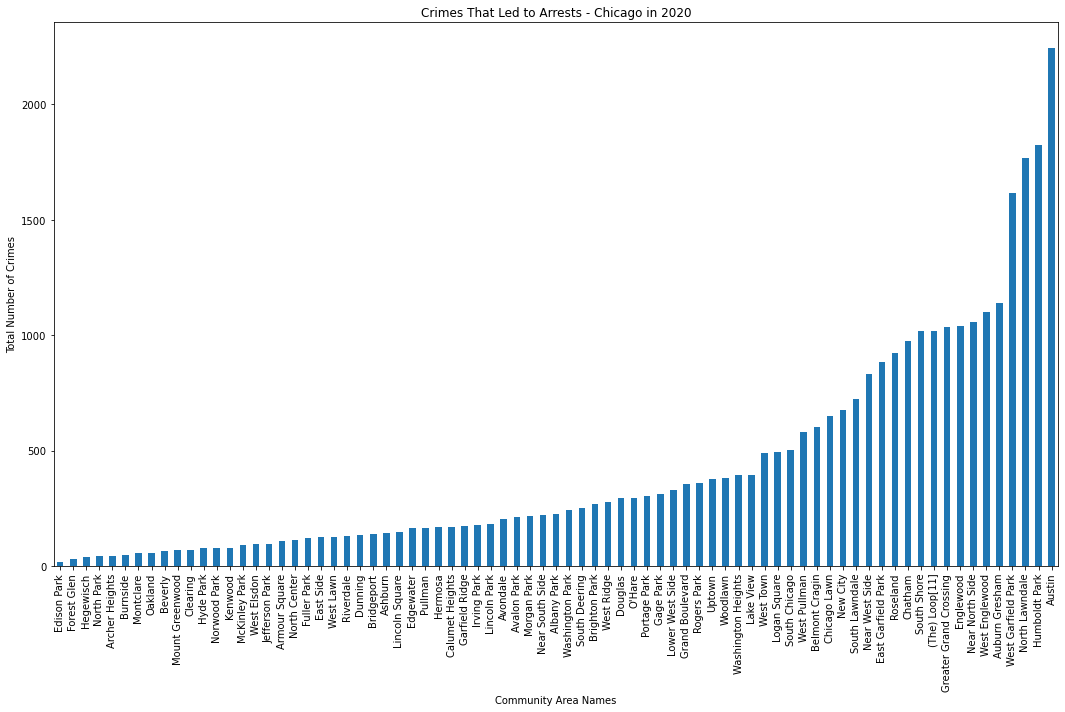

In [16]:
# plot bar chart
d_sorted.plot(kind='bar', figsize=(18, 10))

plt.xlabel('Community Area Names') # add to x-label to the plot
plt.ylabel('Total Number of Crimes') # add y-label to the plot
plt.title('Crimes That Led to Arrests - Chicago in 2020') # add title to the plot

plt.show()

In [17]:
# geolocation values for Chicago obtained via google search
latitude = 41.881832
longitude = -87.623177

In [18]:
# download chicago community area geojson file
!wget --quiet !wget --quiet https://github.com/RandomFractals/ChicagoCrimes/blob/master/data/chicago-community-areas.geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [19]:
# copy geojson file into variable
chicago_geo = r'chicago-community-areas.geojson' # geojson file

# reset the index of dataframe d_sorted and change community area name colume to all uppercase to match geojson variables
d_grouped = d_grouped.reset_index()
d_grouped['Community Area Name'] = d_grouped['Community Area Name'].str.upper() 

In [20]:
# create a default chicago map
chicago_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In [21]:
# create a numpy array of length 6 and has linear spacing from the minium to the maximum number of crimes
threshold_scale = np.linspace(d_grouped['Block'].min(),
                              d_grouped['Block'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum

# create choropleth map with the chicago 2020 crimes data
chicago_map.choropleth(
    geo_data=chicago_geo,
    data=d_grouped,
    columns=['Community Area Name','Block'],
    key_on='feature.properties.community',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in Chicago in 2020'
    )

# display map
chicago_map

In [22]:
# to creat a cluster map, the number of records in the dataset is reduced

# sort dataset by date and place the latest 1000 records into sorted dataset
dataset_sorted = dataset.sort_values(by=['Date'])
dataset_sorted = dataset_sorted.reset_index(drop=True)
dataset_sorted = dataset_sorted.tail(1000)
dataset_sorted

Date                     Block       Primary Type  \
31608  12/11/2020 09:18:00 AM          033XX W HURON ST          NARCOTICS   
31609  12/11/2020 09:21:00 AM           022XX E 70TH ST            ASSAULT   
31610  12/11/2020 09:23:00 PM      015XX W VAN BUREN ST            BATTERY   
31611  12/11/2020 09:32:00 PM  095XX S STONY ISLAND AVE  WEAPONS VIOLATION   
31612  12/11/2020 09:38:00 PM      039XX W LEXINGTON ST          NARCOTICS   
...                       ...                       ...                ...   
32603  12/26/2020 12:25:00 PM          001XX E 115TH ST  WEAPONS VIOLATION   
32604  12/26/2020 12:33:00 AM      044XX W WEST END AVE  WEAPONS VIOLATION   
32605  12/26/2020 12:45:00 PM           021XX E 71ST ST              THEFT   
32606  12/26/2020 12:50:00 AM     051XX N MILWAUKEE AVE            ASSAULT   
32607  12/26/2020 12:52:00 AM       060XX N NAVARRE AVE            ASSAULT   

                                             Description  \
31608                           POSSESS - HEROIN (WHITE)   
31609                               AGGRAVATED - HANDGUN   
31610                AGGRAVATED - OTHER DANGEROUS WEAPON   
31611                      UNLAWFUL POSSESSION - HANDGUN   
31612                           POSSESS - HEROIN (WHITE)   
...                                                  ...   
32603                             UNLAWFUL USE - HANDGUN   
32604                      UNLAWFUL POSSESSION - HANDGUN   
32605                                       RETAIL THEFT   
32606  AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...   
32607                                             SIMPLE   

                        Location Description  Arrest  Community Area  \
31608                               SIDEWALK     1.0              23   
31609                              APARTMENT     1.0              43   
31610                                 STREET     1.0              28   
31611                            GAS STATION     1.0              51   
31612                               SIDEWALK     1.0              26   
...                                      ...     ...             ...   
32603                                 STREET     1.0              53   
32604                                  ALLEY     1.0              26   
32605                     GROCERY FOOD STORE     1.0              43   
32606  POLICE FACILITY / VEHICLE PARKING LOT     1.0              11   
32607                                 STREET     1.0              10   

        Latitude  Longitude Community Area Name  
31608  41.893683 -87.710683       Humboldt Park  
31609  41.768033 -87.570881         South Shore  
31610  41.876355 -87.666176      Near West Side  
31611  41.721844 -87.585072       South Deering  
31612  41.871645 -87.724185  West Garfield Park  
...          ...        ...                 ...  
32603  41.685359 -87.619330        West Pullman  
32604  41.883235 -87.736480  West Garfield Park  
32605  41.766102 -87.573539         South Shore  
32606  41.974130 -87.766357      Jefferson Park  
32607  41.990276 -87.792864        Norwood Park  

[1000 rows x 10 columns]

In [23]:
# Start again with a clean copy of the map
chicago_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

In [24]:
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(chicago_map)
  
# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(dataset_sorted['Latitude'], dataset_sorted['Longitude'], dataset_sorted['Primary Type']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
chicago_map

In [25]:
# check how many unique crimes are listed in the dataset
print('There are {} unique crimes listed in the dataset.'.format(len(dataset['Primary Type'].unique())))

There are 30 unique crimes listed in the dataset.


In [26]:
# conduct analysis of each community area

# one hot encoding
dataset_onehot = pd.get_dummies(dataset[['Primary Type']], prefix="", prefix_sep="")

# add Community Area Name column back to dataframe
dataset_onehot['Community Area Name'] = dataset['Community Area Name'] 

# move Community Area Name column to the first column
fixed_columns = [dataset_onehot.columns[-1]] + list(dataset_onehot.columns[:-1])
dataset_onehot = dataset_onehot[fixed_columns]

dataset_onehot

Community Area Name  ARSON  ASSAULT  BATTERY  BURGLARY  \
0                  Austin      0        0        0         0   
1                  Austin      0        0        1         0   
2                  Austin      0        0        0         0   
3                  Austin      0        0        0         0   
4                  Austin      0        0        0         0   
...                   ...    ...      ...      ...       ...   
32603          North Park      0        0        0         0   
32604          North Park      0        0        0         0   
32605          North Park      0        0        0         0   
32606          North Park      0        0        1         0   
32607          North Park      0        0        0         0   

       CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   
...                                  ...                  ...   
32603                                  0                    0   
32604                                  0                    0   
32605                                  0                    0   
32606                                  0                    0   
32607                                  0                    0   

       CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  ...  \
0                    0                        0                  0  ...   
1                    0                        0                  0  ...   
2                    0                        0                  1  ...   
3                    0                        0                  0  ...   
4                    0                        0                  0  ...   
...                ...                      ...                ...  ...   
32603                0                        0                  0  ...   
32604                0                        0                  0  ...   
32605                0                        0                  0  ...   
32606                0                        0                  0  ...   
32607                0                        0                  0  ...   

       OTHER NARCOTIC VIOLATION  OTHER OFFENSE  PROSTITUTION  \
0                             0              0             0   
1                             0              0             0   
2                             0              0             0   
3                             0              0             0   
4                             0              0             0   
...                         ...            ...           ...   
32603                         0              0             1   
32604                         0              0             0   
32605                         0              0             0   
32606                         0              0             0   
32607                         0              0             0   

       PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  ROBBERY  SEX OFFENSE  \
0                     0                       0        0            0   
1                     0                       0        0            0   
2                     0                       0        0            0   
3                     0                       0        0            0   
4                     0                       0        0            0   
...                 ...                     ...      ...          ...   
32603                 0                       0        0            0   
32604                 0                       0        0            0   
32605                 0                       0        0            0   
32606                 0                       0        0

In [27]:
# Group rows by community area name and by taking the mean of the frequency of occurrence of each category
dataset_grouped = dataset_onehot.groupby('Community Area Name').mean().reset_index()
dataset_grouped

Community Area Name     ARSON   ASSAULT   BATTERY  BURGLARY  \
0       (The) Loop[11]  0.000983  0.048181  0.185841  0.020649   
1          Albany Park  0.000000  0.062780  0.210762  0.008969   
2       Archer Heights  0.000000  0.155556  0.266667  0.022222   
3        Armour Square  0.027523  0.100917  0.110092  0.064220   
4              Ashburn  0.006944  0.125000  0.305556  0.020833   
..                 ...       ...       ...       ...       ...   
72           West Lawn  0.000000  0.096774  0.225806  0.008065   
73        West Pullman  0.000000  0.075993  0.240069  0.008636   
74          West Ridge  0.000000  0.079710  0.315217  0.021739   
75           West Town  0.000000  0.081800  0.220859  0.028630   
76            Woodlawn  0.000000  0.078329  0.232376  0.005222   

    CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  CRIMINAL DAMAGE  \
0                            0.000983                  0.0         0.040315   
1                            0.004484                  0.0         0.089686   
2                            0.000000                  0.0         0.022222   
3                            0.009174                  0.0         0.045872   
4                            0.000000                  0.0         0.048611   
..                                ...                  ...              ...   
72                           0.000000                  0.0         0.040323   
73                           0.003454                  0.0         0.027634   
74                           0.000000                  0.0         0.043478   
75                           0.000000                  0.0         0.044990   
76                           0.000000                  0.0         0.054830   

    CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  ...  OTHER NARCOTIC VIOLATION  \
0                  0.000000           0.107178  ...                       0.0   
1                  0.000000           0.053812  ...                       0.0   
2                  0.000000           0.044444  ...                       0.0   
3                  0.000000           0.027523  ...                       0.0   
4                  0.006944           0.055556  ...                       0.0   
..                      ...                ...  ...                       ...   
72                 0.000000           0.040323  ...                       0.0   
73                 0.000000           0.051813  ...                       0.0   
74                 0.000000           0.050725  ...                       0.0   
75                 0.004090           0.069530  ...                       0.0   
76                 0.000000           0.049608  ...                       0.0   

    OTHER OFFENSE  PROSTITUTION  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  \
0        0.017699      0.000000          0.000983                0.026549   
1        0.026906      0.000000          0.000000                0.008969   
2        0.022222      0.000000          0.000000                0.000000   
3        0.027523      0.000000          0.000000                0.027523   
4        0.034722      0.000000          0.000000                0.020833   
..            ...           ...               ...                     ...   
72       0.064516      0.000000          0.000000                0.000000   
73       0.117444      0.005181          0.000000                0.006908   
74       0.054348      0.000000          0.000000                0.007246   
75       0.038855      0.002045          0.002045                0.012270   
76       0.060052      0.000000          0.000000                0.015666   

     ROBBERY  SEX OFFENSE  STALKING     THEFT  WEAPONS VIOLATION  
0   0.032448     0.005900       0.0  0.289086           0.086529  
1   0.035874     0.004484       0.0  0.098655           0.085202  
2   0.022222     0.000000       0.0  0.155556           0.088889  
3   0.027523     0.009174       0.0  0.073394           0.155963  
4   0.006944     0.000000   

In [28]:
# list each community area name along with the top 5 most common crimes
num_top_crimes = 5

for hood in dataset_grouped['Community Area Name']:
    print("----"+hood+"----")
    temp = dataset_grouped[dataset_grouped['Community Area Name'] == hood].T.reset_index()
    temp.columns = ['crime','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_crimes))

    print('\n')

----(The) Loop[11]----
               crime  freq
0              THEFT  0.29
1            BATTERY  0.19
2  CRIMINAL TRESPASS  0.11
3  WEAPONS VIOLATION  0.09
4          NARCOTICS  0.08


----Albany Park----
               crime  freq
0          NARCOTICS  0.24
1            BATTERY  0.21
2              THEFT  0.10
3  WEAPONS VIOLATION  0.09
4    CRIMINAL DAMAGE  0.09


----Archer Heights----
               crime  freq
0            BATTERY  0.27
1              THEFT  0.16
2            ASSAULT  0.16
3          NARCOTICS  0.11
4  WEAPONS VIOLATION  0.09


----Armour Square----
               crime  freq
0  WEAPONS VIOLATION  0.16
1            BATTERY  0.11
2          NARCOTICS  0.11
3            ASSAULT  0.10
4              THEFT  0.07


----Ashburn----
               crime  freq
0            BATTERY  0.31
1          NARCOTICS  0.15
2  WEAPONS VIOLATION  0.12
3            ASSAULT  0.12
4  CRIMINAL TRESPASS  0.06


----Auburn Gresham----
               crime  freq
0            BATTERY  0.25

In [29]:
# define function to sort the crimes in descending order.
def return_most_common_crimes(row, num_top_crimes):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_crimes]

In [30]:
# create the new dataframe and display the top 10 crimes for each community area name
num_top_crimes = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top crimes
columns = ['Community Area Name']
for ind in np.arange(num_top_crimes):
    try:
        columns.append('{}{} Most Common Crime'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Crime'.format(ind+1))

# create a new dataframe
dataset_crimes_sorted = pd.DataFrame(columns=columns)
dataset_crimes_sorted['Community Area Name'] = dataset_grouped['Community Area Name']

for ind in np.arange(dataset_grouped.shape[0]):
    dataset_crimes_sorted.iloc[ind, 1:] = return_most_common_crimes(dataset_grouped.iloc[ind, :], num_top_crimes)

dataset_crimes_sorted

Community Area Name 1st Most Common Crime 2nd Most Common Crime  \
0       (The) Loop[11]                 THEFT               BATTERY   
1          Albany Park             NARCOTICS               BATTERY   
2       Archer Heights               BATTERY               ASSAULT   
3        Armour Square     WEAPONS VIOLATION             NARCOTICS   
4              Ashburn               BATTERY             NARCOTICS   
..                 ...                   ...                   ...   
72           West Lawn                 THEFT               BATTERY   
73        West Pullman               BATTERY     WEAPONS VIOLATION   
74          West Ridge               BATTERY             NARCOTICS   
75           West Town               BATTERY                 THEFT   
76            Woodlawn     WEAPONS VIOLATION               BATTERY   

   3rd Most Common Crime 4th Most Common Crime 5th Most Common Crime  \
0      CRIMINAL TRESPASS     WEAPONS VIOLATION             NARCOTICS   
1                  THEFT       CRIMINAL DAMAGE     WEAPONS VIOLATION   
2                  THEFT             NARCOTICS     WEAPONS VIOLATION   
3                BATTERY               ASSAULT                 THEFT   
4      WEAPONS VIOLATION               ASSAULT     CRIMINAL TRESPASS   
..                   ...                   ...                   ...   
72             NARCOTICS               ASSAULT         OTHER OFFENSE   
73             NARCOTICS         OTHER OFFENSE               ASSAULT   
74               ASSAULT                 THEFT     WEAPONS VIOLATION   
75               ASSAULT     WEAPONS VIOLATION             NARCOTICS   
76             NARCOTICS               ASSAULT         OTHER OFFENSE   

         6th Most Common Crime 7th Most Common Crime 8th Most Common Crime  \
0                      ASSAULT       CRIMINAL DAMAGE               ROBBERY   
1                      ASSAULT     CRIMINAL TRESPASS               ROBBERY   
2   OFFENSE INVOLVING CHILDREN     CRIMINAL TRESPASS   MOTOR VEHICLE THEFT   
3                     BURGLARY       CRIMINAL DAMAGE    DECEPTIVE PRACTICE   
4              CRIMINAL DAMAGE         OTHER OFFENSE   MOTOR VEHICLE THEFT   
..                         ...                   ...                   ...   
72           WEAPONS VIOLATION     CRIMINAL TRESPASS       CRIMINAL DAMAGE   
73           CRIMINAL TRESPASS                 THEFT       CRIMINAL DAMAGE   
74               OTHER OFFENSE     CRIMINAL TRESPASS       CRIMINAL DAMAGE   
75           CRIMINAL TRESPASS       CRIMINAL DAMAGE         OTHER OFFENSE   
76                       THEFT       CRIMINAL DAMAGE     CRIMINAL TRESPASS   

               9th Most Common Crime            10th Most Common Crime  
0             PUBLIC PEACE VIOLATION                DECEPTIVE PRACTICE  
1                      OTHER OFFENSE        OFFENSE INVOLVING CHILDREN  
2                    CRIMINAL DAMAGE                     OTHER OFFENSE  
3                           HOMICIDE              LIQUOR LAW VIOLATION  
4                              THEFT                          BURGLARY  
..                               ...                               ...  
72               MOTOR VEHICLE THEFT                DECEPTIVE PRACTICE  
73  INTERFERENCE WITH PUBLIC OFFICER                          HOMICIDE  
74               MOTOR VEHICLE THEFT                          BURGLARY  
75                DECEPTIVE PRACTICE               MOTOR VEHICLE THEFT  
76            PUBLIC PEACE VIOLATION  INTERFERENCE WITH PUBLIC OFFICER  

[77 rows x 11 columns]

In [31]:
# create new dataframe with the lowest 10 crime ridden community areas in Chicago for 2020
d_grouped2 = d_sorted.head(10)
d_grouped2 = d_grouped2.reset_index()

# add state suffix to pinpoint search on foursquare
d_grouped2['Community Area Name'] = d_grouped2['Community Area Name'].astype(str) + ', IL'
d_grouped2 = d_grouped2.rename(columns={'Block' : 'Incidents'})
d_grouped2

Community Area Name  Incidents
0      Edison Park, IL         16
1      Forest Glen, IL         28
2        Hegewisch, IL         40
3       North Park, IL         44
4   Archer Heights, IL         45
5         Burnside, IL         49
6        Montclare, IL         56
7          Oakland, IL         58
8          Beverly, IL         63
9  Mount Greenwood, IL         67

In [32]:
# Define Foursquare Credentials and Version
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials are loaded.')

Your credentials are loaded.


In [33]:
# Explore the 10 lowest crime ridden community areas in chicago 2020

# create a function to repeat get nearby venues process
def getNearbyVenues(names, radius=3219): # radius of 3219 meters (~ 2 miles)
    venues_list=[]
    for name in zip(names):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            name,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community Area Name',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
# run function for each community area and create new dataframe chicago_venues
chicago_venues = getNearbyVenues(names=d_grouped2['Community Area Name'])

('Edison Park, IL',)
('Forest Glen, IL',)
('Hegewisch, IL',)
('North Park, IL',)
('Archer Heights, IL',)
('Burnside, IL',)
('Montclare, IL',)
('Oakland, IL',)
('Beverly, IL',)
('Mount Greenwood, IL',)


In [35]:
# check size of resulting dataframe
print(chicago_venues.shape)
chicago_venues.head()

(815, 5)


Community Area Name                         Venue  Venue Latitude  \
0  (Edison Park, IL,)                   Dairy Queen       41.997048   
1  (Edison Park, IL,)  Tony's Italian Deli and Subs       42.002882   
2  (Edison Park, IL,)               Zia's Trattoria       42.002697   
3  (Edison Park, IL,)                Nonna Silvia's       41.993171   
4  (Edison Park, IL,)              Firewater Saloon       42.002468   

   Venue Longitude      Venue Category  
0       -87.821616      Ice Cream Shop  
1       -87.816443       Deli / Bodega  
2       -87.816013  Italian Restaurant  
3       -87.822319  Italian Restaurant  
4       -87.816378                 Bar

In [36]:
# check how many venues were returned for each community area
chicago_venues.groupby('Community Area Name').count()

Venue  Venue Latitude  Venue Longitude  Venue Category
Community Area Name                                                           
(Archer Heights, IL,)     100             100              100             100
(Beverly, IL,)            100             100              100             100
(Burnside, IL,)            10              10               10              10
(Edison Park, IL,)        100             100              100             100
(Forest Glen, IL,)        100             100              100             100
(Hegewisch, IL,)          100             100              100             100
(Montclare, IL,)          100             100              100             100
(Mount Greenwood, IL,)    100             100              100             100
(North Park, IL,)         100             100              100             100
(Oakland, IL,)              5               5                5               5

In [37]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 158 uniques categories.


In [38]:
# Analyze each community area

# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add Community Area Name code column back to dataframe
chicago_onehot['Community Area Name'] = chicago_venues['Community Area Name'] 

# move community area name column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

Community Area Name  ATM  Airport Service  American Restaurant  \
0  (Edison Park, IL,)    0                0                    0   
1  (Edison Park, IL,)    0                0                    0   
2  (Edison Park, IL,)    0                0                    0   
3  (Edison Park, IL,)    0                0                    0   
4  (Edison Park, IL,)    0                0                    0   

   Antique Shop  Arcade  Argentinian Restaurant  Art Museum  \
0             0       0                       0           0   
1             0       0                       0           0   
2             0       0                       0           0   
3             0       0                       0           0   
4             0       0                       0           0   

   Arts & Crafts Store  Asian Restaurant  ...  Theme Restaurant  \
0                    0                 0  ...                 0   
1                    0                 0  ...                 0   
2                    0                 0  ...                 0   
3                    0                 0  ...                 0   
4                    0                 0  ...                 0   

   Thrift / Vintage Store  Trail  Tunnel  Turkish Restaurant  Video Store  \
0                       0      0       0                   0            0   
1                       0      0       0                   0            0   
2                       0      0       0                   0            0   
3                       0      0       0                   0            0   
4                       0      0       0                   0            0   

   Vietnamese Restaurant  Winery  Wings Joint  Yoga Studio  
0                      0       0            0            0  
1                      0       0            0            0  
2                      0       0            0            0  
3                      0       0            0            0  
4                      0       0            0            0  

[5 rows x 159 columns]

In [39]:
# group rows by Community Area Name and by taking the mean of the frequency of occurrence of each category
chicago_grouped = chicago_onehot.groupby('Community Area Name').mean().reset_index()
chicago_grouped

Community Area Name   ATM  Airport Service  American Restaurant  \
0   (Archer Heights, IL,)  0.00             0.02                 0.01   
1          (Beverly, IL,)  0.00             0.00                 0.01   
2         (Burnside, IL,)  0.00             0.00                 0.00   
3      (Edison Park, IL,)  0.00             0.00                 0.04   
4      (Forest Glen, IL,)  0.00             0.00                 0.05   
5        (Hegewisch, IL,)  0.00             0.00                 0.03   
6        (Montclare, IL,)  0.00             0.00                 0.01   
7  (Mount Greenwood, IL,)  0.01             0.00                 0.02   
8       (North Park, IL,)  0.00             0.00                 0.02   
9          (Oakland, IL,)  0.00             0.00                 0.00   

   Antique Shop  Arcade  Argentinian Restaurant  Art Museum  \
0           0.0    0.00                    0.00        0.00   
1           0.0    0.00                    0.00        0.01   
2           0.0    0.00                    0.00        0.00   
3           0.0    0.01                    0.00        0.00   
4           0.0    0.00                    0.00        0.01   
5           0.0    0.00                    0.00        0.00   
6           0.0    0.00                    0.00        0.00   
7           0.0    0.00                    0.00        0.01   
8           0.0    0.00                    0.01        0.00   
9           0.2    0.00                    0.00        0.00   

   Arts & Crafts Store  Asian Restaurant  ...  Theme Restaurant  \
0                 0.01              0.00  ...              0.00   
1                 0.01              0.00  ...              0.00   
2                 0.00              0.00  ...              0.00   
3                 0.00              0.00  ...              0.00   
4                 0.00              0.00  ...              0.00   
5                 0.00              0.00  ...              0.00   
6                 0.00              0.02  ...              0.00   
7                 0.00              0.00  ...              0.00   
8                 0.00              0.01  ...              0.01   
9                 0.00              0.00  ...              0.00   

   Thrift / Vintage Store  Trail  Tunnel  Turkish Restaurant  Video Store  \
0                    0.00   0.00     0.0                0.00         0.00   
1                    0.00   0.01     0.0                0.00         0.00   
2                    0.00   0.20     0.1                0.00         0.00   
3                    0.00   0.00     0.0                0.01         0.00   
4                    0.00   0.02     0.0                0.00         0.00   
5                    0.00   0.00     0.0                0.00         0.00   
6                    0.01   0.00     0.0                0.00         0.00   
7                    0.00   0.00     0.0                0.00         0.00   
8                    0.00   0.00     0.0                0.00         0.02   
9                    0.00   0.00     0.0                0.00         0.00   

   Vietnamese Restaurant  Winery  Wings Joint  Yoga Studio  
0                   0.00    0.00         0.01         0.00  
1                   0.00    0.00         0.00         0.00  
2                   0.00    0.00         0.00         0.00  
3                   0.00    0.00         0.00         0.01  
4                   0.02    0.00         0.00         0.01  
5                   0.00    0.00         0.01         0.00  
6                   0.00    0.01         0.01         0.00  
7                   0.00    0.00         0.00         0.00  
8                   0.00    0.00         0.00         0.00  
9                   0.00    0.00         0.00         0.00  

[10 rows x 159 columns]

In [40]:
# cleanup community area name column
chicago_grouped['Community Area Name'] = chicago_grouped['Community Area Name'].astype(str)
chicago_grouped['Community Area Name'].replace("('Archer Heights, IL',)", 'Archer Heights', inplace=True)
chicago_grouped['Community Area Name'].replace("('Beverly, IL',)", 'Beverly', inplace=True)
chicago_grouped['Community Area Name'].replace("('Burnside, IL',)", 'Burnside', inplace=True)
chicago_grouped['Community Area Name'].replace("('Edison Park, IL',)", 'Edison Park', inplace=True)
chicago_grouped['Community Area Name'].replace("('Forest Glen, IL',)", 'Forest Glen', inplace=True)
chicago_grouped['Community Area Name'].replace("('Hegewisch, IL',)", 'Hegewisch', inplace=True)
chicago_grouped['Community Area Name'].replace("('Montclare, IL',)", 'Montclare', inplace=True)
chicago_grouped['Community Area Name'].replace("('Mount Greenwood, IL',)", 'Mount Greenwood', inplace=True)
chicago_grouped['Community Area Name'].replace("('North Park, IL',)", 'North Park', inplace=True)
chicago_grouped['Community Area Name'].replace("('Oakland, IL',)", 'Oakland', inplace=True)
chicago_grouped

Community Area Name   ATM  Airport Service  American Restaurant  \
0      Archer Heights  0.00             0.02                 0.01   
1             Beverly  0.00             0.00                 0.01   
2            Burnside  0.00             0.00                 0.00   
3         Edison Park  0.00             0.00                 0.04   
4         Forest Glen  0.00             0.00                 0.05   
5           Hegewisch  0.00             0.00                 0.03   
6           Montclare  0.00             0.00                 0.01   
7     Mount Greenwood  0.01             0.00                 0.02   
8          North Park  0.00             0.00                 0.02   
9             Oakland  0.00             0.00                 0.00   

   Antique Shop  Arcade  Argentinian Restaurant  Art Museum  \
0           0.0    0.00                    0.00        0.00   
1           0.0    0.00                    0.00        0.01   
2           0.0    0.00                    0.00        0.00   
3           0.0    0.01                    0.00        0.00   
4           0.0    0.00                    0.00        0.01   
5           0.0    0.00                    0.00        0.00   
6           0.0    0.00                    0.00        0.00   
7           0.0    0.00                    0.00        0.01   
8           0.0    0.00                    0.01        0.00   
9           0.2    0.00                    0.00        0.00   

   Arts & Crafts Store  Asian Restaurant  ...  Theme Restaurant  \
0                 0.01              0.00  ...              0.00   
1                 0.01              0.00  ...              0.00   
2                 0.00              0.00  ...              0.00   
3                 0.00              0.00  ...              0.00   
4                 0.00              0.00  ...              0.00   
5                 0.00              0.00  ...              0.00   
6                 0.00              0.02  ...              0.00   
7                 0.00              0.00  ...              0.00   
8                 0.00              0.01  ...              0.01   
9                 0.00              0.00  ...              0.00   

   Thrift / Vintage Store  Trail  Tunnel  Turkish Restaurant  Video Store  \
0                    0.00   0.00     0.0                0.00         0.00   
1                    0.00   0.01     0.0                0.00         0.00   
2                    0.00   0.20     0.1                0.00         0.00   
3                    0.00   0.00     0.0                0.01         0.00   
4                    0.00   0.02     0.0                0.00         0.00   
5                    0.00   0.00     0.0                0.00         0.00   
6                    0.01   0.00     0.0                0.00         0.00   
7                    0.00   0.00     0.0                0.00         0.00   
8                    0.00   0.00     0.0                0.00         0.02   
9                    0.00   0.00     0.0                0.00         0.00   

   Vietnamese Restaurant  Winery  Wings Joint  Yoga Studio  
0                   0.00    0.00         0.01         0.00  
1                   0.00    0.00         0.00         0.00  
2                   0.00    0.00         0.00         0.00  
3                   0.00    0.00         0.00         0.01  
4                   0.02    0.00         0.00         0.01  
5                   0.00    0.00         0.01         0.00  
6                   0.00    0.01         0.01         0.00  
7                   0.00    0.00         0.00         0.00  
8                   0.00    0.00         0.00         0.00  
9                   0.00    0.00         0.00         0.00  

[10 rows x 159 columns]

In [41]:
# define function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
# create the new dataframe and display the top 10 venues for each community area
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community Area Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
chicago_venues_sorted = pd.DataFrame(columns=columns)
chicago_venues_sorted['Community Area Name'] = chicago_grouped['Community Area Name']

for ind in np.arange(chicago_grouped.shape[0]):
    chicago_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

chicago_venues_sorted

Community Area Name    1st Most Common Venue 2nd Most Common Venue  \
0      Archer Heights       Mexican Restaurant   Rental Car Location   
1             Beverly                     Park        Sandwich Place   
2            Burnside              Post Office     Convenience Store   
3         Edison Park       Italian Restaurant           Coffee Shop   
4         Forest Glen                     Park           Coffee Shop   
5           Hegewisch       Mexican Restaurant  Fast Food Restaurant   
6           Montclare       Mexican Restaurant  Fast Food Restaurant   
7     Mount Greenwood              Pizza Place    Italian Restaurant   
8          North Park              Pizza Place        Breakfast Spot   
9             Oakland  State / Provincial Park          Antique Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place            Donut Shop            Taco Place   
1              Pharmacy           Pizza Place         Grocery Store   
2                 Trail                  Park                Tunnel   
3         Grocery Store           Pizza Place   American Restaurant   
4   American Restaurant           Pizza Place                   Bar   
5           Pizza Place                   Bar        Sandwich Place   
6         Grocery Store       Thai Restaurant    Italian Restaurant   
7  Fast Food Restaurant        Breakfast Spot         Grocery Store   
8    Italian Restaurant        Ice Cream Shop        Sandwich Place   
9                  Café           Pizza Place                  Farm   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Fast Food Restaurant        Sandwich Place                   Bar   
1                Burger Joint    Italian Restaurant  Fast Food Restaurant   
2  Construction & Landscaping  Other Great Outdoors           Yoga Studio   
3                    Pharmacy        Breakfast Spot    Salon / Barbershop   
4               Grocery Store    Mexican Restaurant               Brewery   
5          Seafood Restaurant        Discount Store         Grocery Store   
6                 Coffee Shop           Pizza Place              Pharmacy   
7               Hot Dog Joint    Mexican Restaurant          Burger Joint   
8                 Coffee Shop                   Gym       Nature Preserve   
9                 Yoga Studio   Filipino Restaurant            Food Truck   

       9th Most Common Venue 10th Most Common Venue  
0             Discount Store     Seafood Restaurant  
1                        Pub     Seafood Restaurant  
2                       Food            Flower Shop  
3              Deli / Bodega        Thai Restaurant  
4  Middle Eastern Restaurant     Chinese Restaurant  
5             Breakfast Spot                   Café  
6                       Park         Discount Store  
7                Coffee Shop         Discount Store  
8                 Donut Shop              BBQ Joint  
9          Food & Drink Shop                   Food